# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(404)

In [2]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img,load_img,img_to_array
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

# Constants

In [3]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
image_width= 32
image_height= 32
image_pixels= image_height*image_width
color_channels=3
total_inputs=image_pixels*color_channels

valid_size=40000
xs_size=1000
NR_CLASSES = 10

# Get the Datat

In [4]:
(x_train_all, y_train_all),(x_tests,y_tests)=cifar10.load_data()

UnpicklingError: invalid load key, '\x00'.

# Explore the Data

<h2> Try to make subplots with matplotlib

# The Challenge

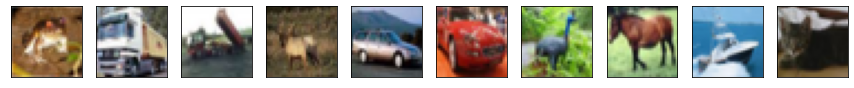

In [5]:
plt.figure(figsize=(15,15))
for x in range (10):
    plt.subplot(1,10,x+1)
    plt.imshow(x_train_all[x])
    plt.yticks([])
    plt.xticks([])

In [6]:
x_train_all[0][0][0]

array([59, 62, 63], dtype=uint8)

# Preprocessing Data and make it smaller by dividing by 255.0 and convert it to float numbers in range [0, 1]

# Scalling our Data

In [7]:
x_train_all, x_tests= x_train_all/255.0 ,x_tests/255.0

In [8]:
x_train_all.shape

(50000, 32, 32, 3)

# Reshapr from 4d to 2d 

In [9]:
x_train_all=x_train_all.reshape(len(x_train_all),total_inputs)

In [10]:
x_train_all.shape

(50000, 3072)

In [11]:
x_tests=x_tests.reshape(x_tests.shape[0],total_inputs)

In [12]:
x_tests.shape

(10000, 3072)

## Create Validations Datasets

In [13]:
x_val=x_train_all[:valid_size]
y_val=y_train_all[:valid_size]

### take the rest to test

In [14]:
x_test=x_train_all[valid_size:]
y_test=y_train_all[valid_size:]

In [15]:
y_test[0]


array([1], dtype=uint8)

### make small Testpacks at first

In [16]:
x_test_xs=x_test[:xs_size]
y_test_xs=y_test[:xs_size]

# Define my first NN and build the first model

## try to configuare Adam Optimizer 

In [17]:
adam_new= tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [18]:
LOG_DIR='logs/'
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# for the first Layer we can define the input with 
# input_shape(inputs,) or with input_dim= inputs 
# because Dense Layers support the specification fo their input shape via argument..

model_1= Sequential([
    Dense(units=128, input_shape=(total_inputs,), activation='relu',name='m1_hid1'),
    Dense(units=64, activation='relu',name='m1_hid2'),
    Dense(units=16, activation='relu',name='m1_hid3'),
    Dense(10, activation='softmax',name='m1_output')
])

model_1.compile(optimizer=adam_new,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [19]:
model_2 =Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
model_2.add(Dense(128, activation='relu',name='m2_hid1'))
model_2.add(Dense(64, activation='relu',name='m2_hid2'))
model_2.add(Dense(16, activation='relu',name='m2_hid3'))
model_2.add(Dense(10, activation='softmax',name='m2_output'))

model_2.compile(optimizer=adam_new,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [20]:
# model_3 =Sequential()
# #first drop out layer
# model_3.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
# model_3.add(Dense(128, activation='relu',name='m3_hid1'))
# #second drop out layer we don't need to add any more args and i can use any seed number i want
# model_3.add(Dropout(0.25,seed=42))
# model_3.add(Dense(64, activation='relu',name='m3_hid3'))
# model_3.add(Dense(16, activation='relu',name='m3_hid4'))
# model_3.add(Dense(10, activation='softmax',name='m3_output'))

# model_3.compile(optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
#     )

# Setup TensorBoard

In [21]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths ,profile_batch=100000000)

# tsb = callbacks.TensorBoard(log_dir=dir_paths)


# Fit our Model and train it

## try another callback

In [22]:
from keras.callbacks import CSVLogger,RemoteMonitor,TensorBoard
csv_logger = CSVLogger('training.log')
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch=100000)
samples_per_batch=50
nr_epochs=150


# tensorboard_1 = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


In [23]:
%%time
nr_epochs=150
try:
    model_1.fit(x_test_xs,y_test_xs,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("learning_rate=0.000001")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

# model_1.save("ahmad_first.model")

Successfully created directory
Wall time: 1min 13s


In [24]:
# %%time
# nr_epochs=100
# try:
#     model_1.fit(x_test,y_test,batch_size=samples_per_batch,epochs=nr_epochs,
#     callbacks=[get_tensorboard("Model_1 XL")],
#     validation_data=(x_val,y_val),
#     verbose=0
#     )
# except:
#         print("Oops!", sys.exc_info()[1], "occured.")
#         print("Next entry.")
#         print()

In [25]:
image_2='ship_2.jpg'
img_t=load_img(image_2,target_size=(32,32))
display(img_t)
img_arr_t=img_to_array(img_t)
img_shaped_t=img_arr_t.reshape(1, total_inputs)

FileNotFoundError: [Errno 2] No such file or directory: 'ship_2.jpg'

In [29]:
%%time
nr_epochs=10
try:
    model_2.fit(img_shaped_t,y_test[8],batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("ship train")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

Oops! name 'img_shaped_t' is not defined occured.
Next entry.

Wall time: 998 µs


In [ ]:
# %%time
# nr_epochs=100
# try:
#     model_3.fit(x_test,y_test,batch_size=samples_per_batch,epochs=nr_epochs,
#     callbacks=[get_tensorboard("Model_3 XL")],
#     validation_data=(x_val,y_val),
#     verbose=0
#     )
# except:
#         print("Oops!", sys.exc_info()[1], "occured.")
#         print("Next entry.")
#         print()

In [ ]:
x_val.shape

In [80]:
print(x_val[0].shape)
test= np.expand_dims(x_val[0], axis=0)
test.shape

(3072,)


(1, 3072)

In [81]:
np.set_printoptions(precision=3)
model_2.predict_classes(test)

array([6], dtype=int64)

In [82]:
y_val[0]

array([6], dtype=uint8)

In [83]:
for con in range(10):
    test_for=np.expand_dims(x_val[con],axis=0)
    pr_res=model_2.predict_classes(test_for)
    # print(pr_res, y_val[con])
    print(f'predicted data {pr_res} , correct value is {y_val[con]}')

predicted data [6] , correct value is [6]
predicted data [8] , correct value is [9]
predicted data [9] , correct value is [9]
predicted data [4] , correct value is [4]
predicted data [8] , correct value is [1]
predicted data [9] , correct value is [1]
predicted data [6] , correct value is [2]
predicted data [7] , correct value is [7]
predicted data [8] , correct value is [8]
predicted data [2] , correct value is [3]


# Evaluation

In [120]:
# image_1='ship_1.jpg'
# image_3='ship_3.jpg'
images=['ship_1.jpg','ship_2.jpg','ship_3.jpg']


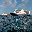

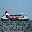

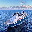

[8]
[8]
[8]


In [128]:
im_shaped=[]
for iml in images:
    img=load_img(iml,target_size=(32,32))
    display(img)
    img_arr=img_to_array(img)
    img_shaped=img_arr.reshape(1, total_inputs)
    im_shaped.append(img_shaped)
for indx in range(len(im_shaped)):
    print(model_2.predict_classes(im_shaped[indx]))
# print(model_2.predict_classes(img_shaped),LABEL_NAMES[model_2.predict_classes(img_shaped)[0]])


## we need to get acc and losses from our model

In [84]:
model_2.metrics_names

['loss', 'accuracy']

## using Evaluate function keras

In [ ]:
test_losses, test_accuracy=model_2.evaluate(x_test,y_test)

In [ ]:
print(f'the loss: {test_losses:0.3} and the accuracy is {test_accuracy:0.1%}')

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
predictions_all= model_2.predict_classes(x_test)
conf_matx=confusion_matrix(y_true=y_test, y_pred=predictions_all)
nr_rows=conf_matx.shape[0]
nr_cols=conf_matx.shape[1]

## Visualising using matplotlib

In [ ]:
import itertools
plt.figure(figsize=(7,7), dpi=130)
plt.imshow(conf_matx,cmap=plt.cm.Greens)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Acutal")
plt.xlabel("Predicted")
tick_marks=np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
for i, j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(i,j , conf_matx[i,j], ha='center', 
    color='white' if conf_matx[i,j] > conf_matx.max()/2 else 'k')


plt.show()

## Calculate the Score Values for our model

In [ ]:
True_Positive= np.diag(conf_matx)
TP_FalsePositive= np.sum(conf_matx, axis=0)  # sum the columns to get False Positive plus the True positive
TP_FalseNegative= np.sum(conf_matx, axis=1)    # sum the Rows to get False Negative plus the True positive


In [ ]:
Recall= True_Positive / TP_FalseNegative
Precision= True_Positive / TP_FalsePositive
F_Score= 2 * (np.mean(Precision) * np.mean(Recall))/ (np.mean(Precision) + np.mean(Recall))

print ( f' Recall : {np.mean(Recall):0.2%} \nthe Precision: {np.mean(Precision):0.2%} \nF_Score: {F_Score:0.2%}  ')